In [24]:
# Import necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10,7)
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
# Load the dataset
plant_data = pd.read_csv("plant.csv")
plant_data.tail(10) 

,temperature,humidity,denomination
90,16.37,45.07,0
91,30.94,46.15,0
92,20.53,43.41,1
93,16.99,78.17,0
94,30.47,62.65,0
95,20.90,42.04,1
96,28.36,47.22,0
97,21.15,79.58,0
98,17.00,76.56,0
99,29.45,81.30,0


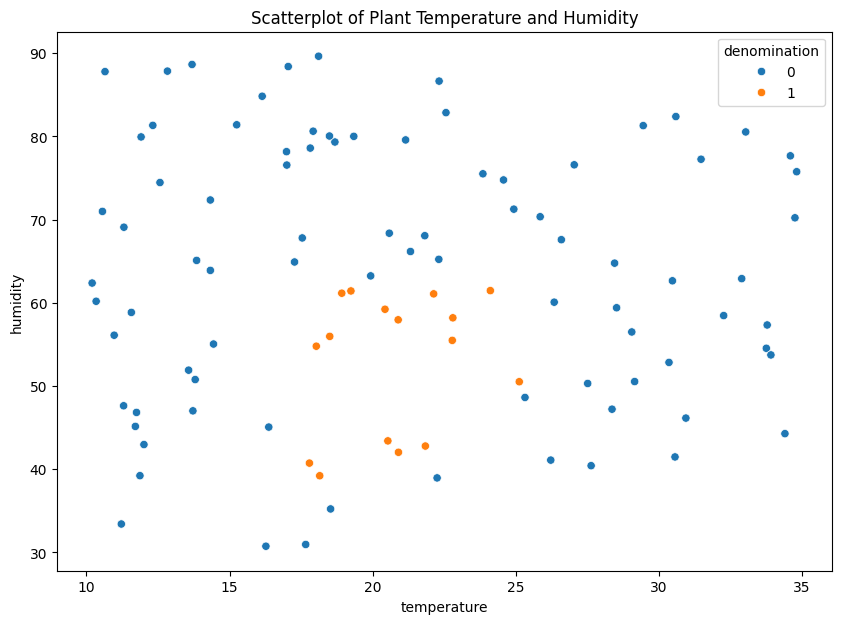

In [26]:
# Visualize using a scatterplot (0 = unhealthy, 1 = healthy)
sns.scatterplot(x="temperature", y="humidity", data=plant_data, hue="denomination")
plt.title("Scatterplot of Plant Temperature and Humidity")
plt.show()


In [ ]:
# Prepare the data for training and testing
X = plant_data[["temperature", "humidity"]].to_numpy()
y = plant_data['denomination'].values 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the input test and train features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

[[26.34 60.08]
 [22.56 82.86]
 [13.69 88.65]
 [20.58 68.37]
 [10.34 60.19]
 [25.32 48.63]
 [11.91 79.94]
 [19.34 80.01]
 [23.85 75.51]
 [21.84 42.79]
 [18.15 39.22]
 [27.04 76.59]
 [13.72 47.02]
 [29.15 50.54]
 [24.57 74.77]
 [22.25 38.96]
 [28.45 64.77]
 [14.33 72.36]
 [30.56 41.48]
 [18.5  55.97]
 [34.75 70.22]
 [18.53 35.23]
 [32.26 58.47]
 [24.93 71.26]
 [22.32 86.65]
 [19.24 61.43]
 [12.83 87.85]
 [27.51 50.31]
 [13.85 65.1 ]
 [22.31 65.23]
 [19.93 63.24]
 [34.81 75.76]
 [33.03 80.54]
 [33.78 57.34]
 [20.89 57.96]
 [16.14 84.83]
 [11.87 39.23]
 [31.47 77.26]
 [29.05 56.5 ]
 [21.32 66.17]
 [13.57 51.91]
 [22.8  58.2 ]
 [26.22 41.1 ]
 [11.3  47.63]
 [17.66 30.96]
 [20.43 59.23]
 [34.59 77.67]
 [34.4  44.28]
 [12.01 42.97]
 [18.92 61.16]
 [10.2  62.38]
 [22.13 61.08]
 [13.8  50.78]
 [26.59 67.59]
 [15.25 81.4 ]
 [18.03 54.79]
 [17.82 78.6 ]
 [18.68 79.33]
 [17.79 40.74]
 [12.32 81.33]
 [30.35 52.84]
 [11.22 33.42]
 [17.27 64.91]
 [17.92 80.63]
 [25.12 50.52]
 [11.31 69.09]
 [18.11 89

In [13]:
# Define the model
model = Sequential([
    layers.Input(shape=(2,)),          
    layers.Dense(64, activation='relu'), 
    layers.Dense(64, activation='relu'), 
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=200, batch_size=16, verbose=0)
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

**#experiement with the accuracy if used only 1 middle layer vs. 2 and so on**

In [14]:
# Print accuracy score
loss,acc = model.evaluate(X_test, y_test)
print("accuracy: ", acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9000 - loss: 0.1714
accuracy:  0.8999999761581421


102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 293us/step


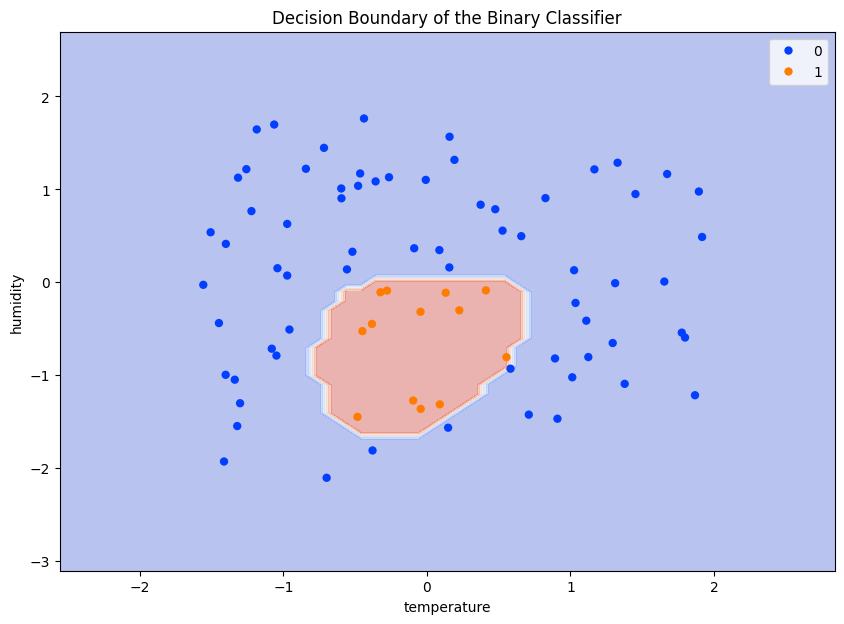

In [16]:
# Plot the Decision Boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.round(Z).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y.flatten(), palette='bright', edgecolor="none")
    plt.xlabel('temperature')
    plt.ylabel('humidity')
    plt.title('Decision Boundary of the Binary Classifier')
    plt.show()

plot_decision_boundary(X_train, y_train, model)

In [10]:
# Query AWS IOT Sitewise
import boto3

sitewise_client = boto3.client('iotsitewise', 'us-east-1')

asset_id = 'f61fd66e-ccd5-4eb3-9bd8-9cf88ce84c92'
temp_id = 'ee288f99-f1dc-4124-a346-c85e12f6c305' #property id
hum_id = 'dd024614-b04b-4820-91e9-48442c8982bf' #property id

try:
    temp_response = sitewise_client.get_asset_property_value(
        assetId=asset_id,
        propertyId=temp_id
    )
    hum_response = sitewise_client.get_asset_property_value(
        assetId=asset_id,
        propertyId=hum_id
    )
    
    temp = temp_response['propertyValue']['value']['doubleValue']
    hum = hum_response['propertyValue']['value']['doubleValue']
    
    print(f"Temperature: {temp}")
    print(f"Humidity: {hum}")    
      
except Exception as e:
        print("Error:", e)


Temperature: 24.0
Humidity: 50.0


In [33]:
# Format sensor data
sensor_data = pd.DataFrame({
    "temperature": [temp],
    "humidity": [hum],
})
sensor_data = scaler.transform(sensor_data[["temperature", "humidity"]])

# Use the model to make predictions
pred = model.predict(sensor_data)
pred = np.round(pred).astype(int).flatten()
if pred[0] == 0:
    output = "unhealthy"
else:
    output = "healthy"
    
print("prediction: ", output)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
prediction:  healthy


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
